<a href="https://colab.research.google.com/github/aliawofford9317/LSAMP_Python_Course2024/blob/Brendan-Gamor/Brendan24Lesson_6d_Matplotlib_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def fetch_data():
  import os, shutil
  cwd = os.getcwd()
  if os.path.exists("LSAMP_Python_Course2024"):
    shutil.rmtree("LSAMP_Python_Course2024")
  !git clone https://github.com/aliawofford9317/LSAMP_Python_Course2024.git
  for file in os.listdir("LSAMP_Python_Course2024"):
    if file.endswith((".txt",".csv")):
      shutil.copy("LSAMP_Python_Course2024/{}".format(file),cwd)
fetch_data()

Cloning into 'LSAMP_Python_Course2024'...
remote: Enumerating objects: 289, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 289 (delta 121), reused 120 (delta 65), pack-reused 70
Receiving objects: 100% (289/289), 2.93 MiB | 5.13 MiB/s, done.
Resolving deltas: 100% (157/157), done.


# Exercises for participation credit

- You will use the `planetary_data_2.csv` file and pandas to graph some data. Use this dataset for Exercise 1 and 2.
- For exercise 3 you will need to use the `births.csv` dataset.

## Exercise 1
- Graph with a scatter plot the density of planets
- Add a title to your graph "Density of planets"
- Add labels to your y and x axis.
- Add one text annotation and one arrow annotation. Text annotation should show the planet with the lowest density. Arrow annotation should should the planet with the highest density.

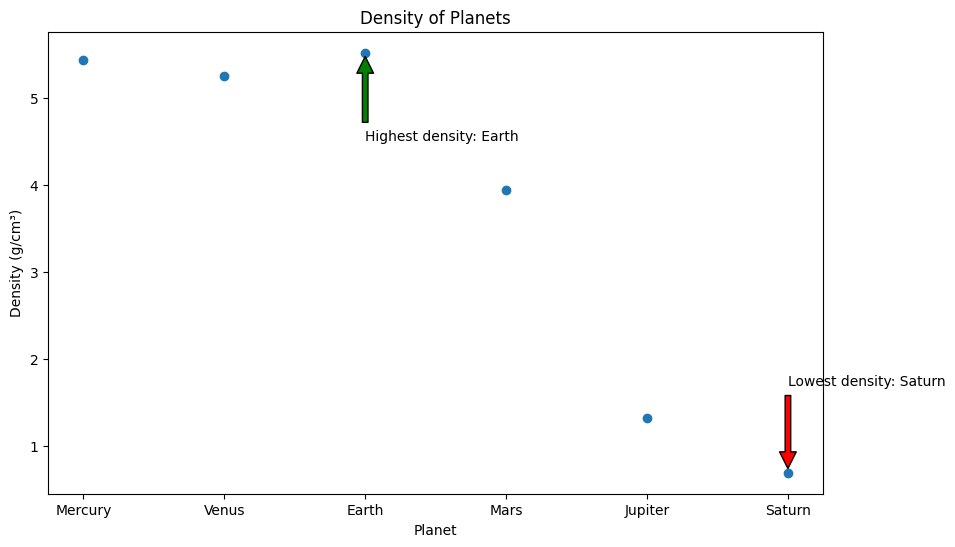

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('planetary_data_2.csv')

plt.figure(figsize=(10, 6))
plt.scatter(data['Body'], data['Densitygcm'])


plt.title('Density of Planets')
plt.xlabel('Planet')
plt.ylabel('Density (g/cm³)')


min_density = data['Densitygcm'].min()
max_density = data['Densitygcm'].max()
min_density_planet = data[data['Densitygcm'] == min_density]['Body'].values[0]
max_density_planet = data[data['Densitygcm'] == max_density]['Body'].values[0]


plt.annotate(f'Lowest density: {min_density_planet}',
             xy=(min_density_planet, min_density),
             xytext=(min_density_planet, min_density + 1),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.annotate(f'Highest density: {max_density_planet}',
             xy=(max_density_planet, max_density),
             xytext=(max_density_planet, max_density - 1),
             arrowprops=dict(facecolor='green', shrink=0.05))


plt.show()


## Exercise 2
- Using a pie chart, plot the mass of the planets. You will need to search the Matplotlib documentation on how to create a pie chart.
- Add a title "Mass of planets".

Index(['Body', 'RadiusKm', 'MassKg', 'Densitygcm', 'Gravityms2'], dtype='object')
      Body    RadiusKm        MassKg  Densitygcm  Gravityms2
0  Mercury   2439.4000  3.302000e+23      5.4291        3.70
1    Venus   6052.0000  4.869000e+24      5.2430        8.87
2    Earth   6371.0084  5.974200e+24      5.5136        9.80
3     Mars   3389.5000  6.419100e+23      3.9341        3.71
4  Jupiter  69911.0000  1.898700e+27      1.3262       24.79


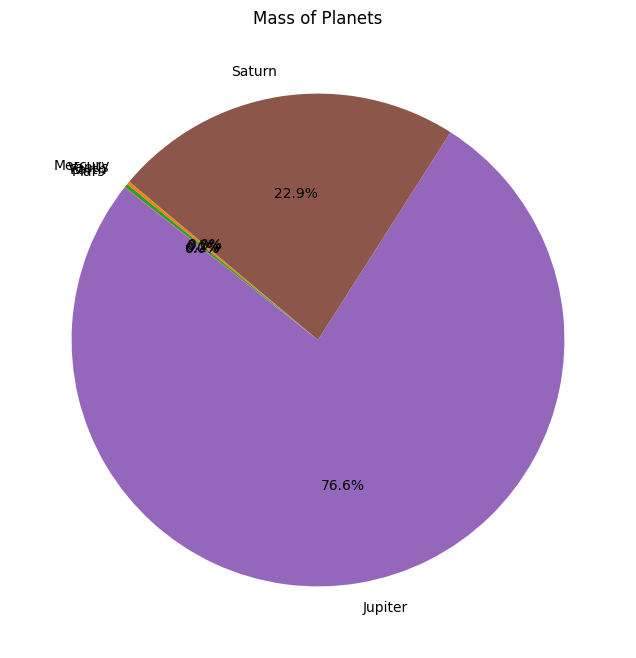

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('planetary_data_2.csv')


print(data.columns)
print(data.head())


planets = data['Body']
masses = data['MassKg']

plt.figure(figsize=(10, 8))
plt.pie(masses, labels=planets, autopct='%1.1f%%', startangle=140)


plt.title('Mass of Planets')


plt.show()


## Exercise 3
- Read the `births.csv` dataset using pandas.
- Plot all the births by month for the year 1992. Annotate the lowest births number and the highest births number on your plot.
- Create a stacked subplot. The top plot should contain the yearly births for the year 2000. The lower subplot should contain all the births for the year 2003.
- Plot both 2000 and 2003 births but this time on a single plot. Add a legend, title, and axis label to this plot.

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')
   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


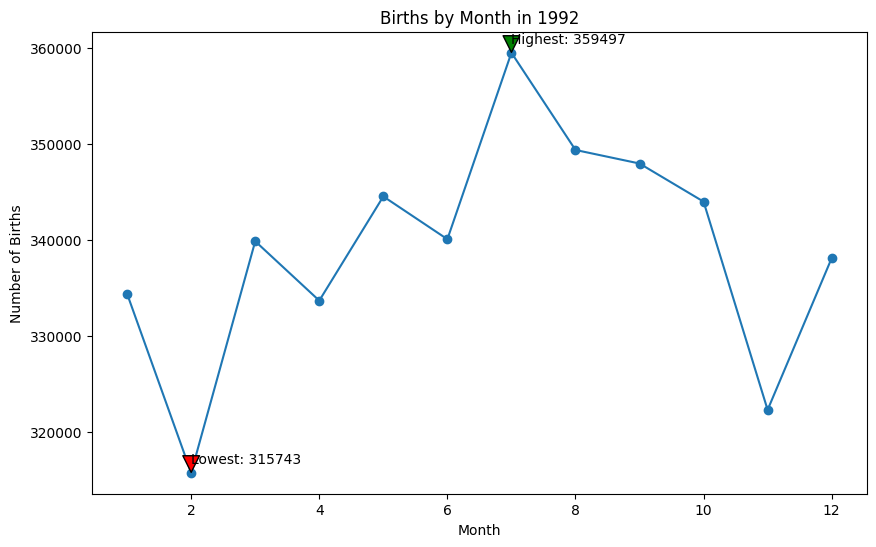

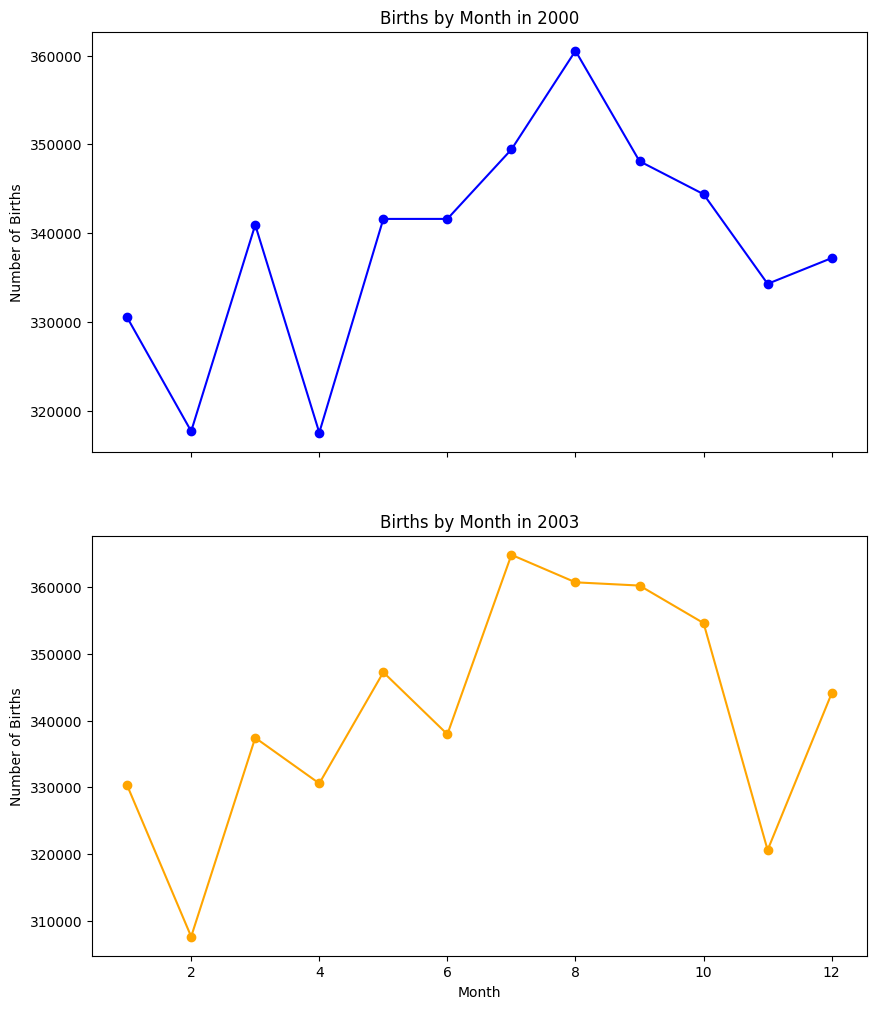

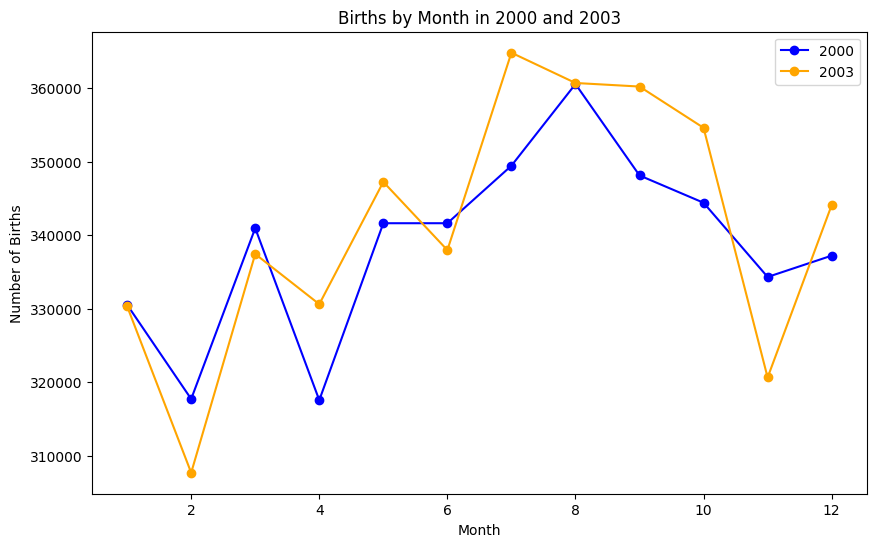

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('births.csv')


print(data.columns)
print(data.head())

births_1992 = data[data['year'] == 1992].groupby('month')['births'].sum()
plt.figure(figsize=(10, 6))
plt.plot(births_1992.index, births_1992.values, marker='o')


min_births = births_1992.min()
max_births = births_1992.max()
min_month = births_1992.idxmin()
max_month = births_1992.idxmax()

plt.annotate(f'Lowest: {min_births}', xy=(min_month, min_births),
             xytext=(min_month, min_births + 1000),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.annotate(f'Highest: {max_births}', xy=(max_month, max_births),
             xytext=(max_month, max_births + 1000),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.title('Births by Month in 1992')
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.show()


births_2000 = data[data['year'] == 2000].groupby('month')['births'].sum()
births_2003 = data[data['year'] == 2003].groupby('month')['births'].sum()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

ax1.plot(births_2000.index, births_2000.values, marker='o', color='blue')
ax1.set_title('Births by Month in 2000')
ax1.set_ylabel('Number of Births')

ax2.plot(births_2003.index, births_2003.values, marker='o', color='orange')
ax2.set_title('Births by Month in 2003')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Births')

plt.show()


plt.figure(figsize=(10, 6))
plt.plot(births_2000.index, births_2000.values, marker='o', label='2000', color='blue')
plt.plot(births_2003.index, births_2003.values, marker='o', label='2003', color='orange')

plt.title('Births by Month in 2000 and 2003')
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.legend()
plt.show()
